# Data Cleaning

Now that we have collected all of our data, we'll need to clean it before we can continue with EDA.

## Import Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = pd.read_csv('city_stats.csv')
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [3]:
df.head()

,CITY,STATE,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,...,POVERTY,FIRMS,MEN_FIRM,FEM_FIRM,MINOR_FIRM,NON_MINOR_FIRM,VET_FIRM,NON_VET_FIRM,POP_AREA,AREA
0,Montgomery,Alabama,liberal,198218.0,6.8,24.0,13.7,53.0,33.3,60.6,...,21.9,18043.0,8879.0,7459.0,8793.0,8363.0,2352.0,14434.0,1289.5,159.57
1,Birmingham,Alabama,liberal,209880.0,6.5,20.3,14.2,53.1,25.3,70.5,...,27.2,20738.0,10318.0,8286.0,10605.0,8770.0,2082.0,17113.0,1453.0,146.07
2,Mobile,Alabama,liberal,189572.0,6.3,21.7,16.0,52.6,44.8,50.6,...,22.0,20118.0,9703.0,8644.0,8808.0,10250.0,2275.0,16639.0,1402.6,139.11
3,Huntsville,Alabama,liberal,197318.0,6.4,21.1,15.7,51.9,61.6,30.6,...,17.7,16838.0,8211.0,6565.0,4380.0,11515.0,1816.0,13915.0,861.5,209.05
4,Hoover,Alabama,liberal,85108.0,6.9,25.4,15.6,52.8,72.7,17.4,...,6.7,7982.0,4402.0,2471.0,1371.0,6147.0,831.0,6551.0,1730.6,47.16


In [4]:
df.shape

(4552, 47)

In [5]:
df.columns

Index(['CITY', 'STATE', 'PA', 'POP', 'UNDER_5', 'UNDER_18', '65_OR_OVER',
       'FEMALE', 'WHITE', 'BLACK', 'AMERICAN_INDIAN', 'ASIAN',
       'PACIFIC_ISLANDER', 'MULTI_RACE', 'HISPANIC', 'VETERAN', 'FOREIGN',
       'HOUSES', 'HOUSE_VAL', 'RENT', 'HOUSEHOLDS', 'PPH', 'YEAR_IN_HOUSE',
       'OTHER_HOME_LANG', 'COMPUTER', 'INTERNET', 'HIGH_SCHOOL', 'BACH_DEGREE',
       'DISABILITY_UNDER_65', 'NO_INSURANCE', 'LABOR', 'FEM_LABOR',
       'HEALTHCARE', 'SHIPMENTS', 'TRAVEL_TIME', 'HOUSEHOLD_INCOME', 'INCOME',
       'POVERTY', 'FIRMS', 'MEN_FIRM', 'FEM_FIRM', 'MINOR_FIRM',
       'NON_MINOR_FIRM', 'VET_FIRM', 'NON_VET_FIRM', 'POP_AREA', 'AREA'],
      dtype='object')

From data collection notebook, we know the columns represent the following data:

`CITY` = city <br>
`STATE` = state <br>
`PA` = political affiliation <br>
`POP` = population <br>
`UNDER_5` = % of people under age 5 <br>
`UNDER_18` = % of people under age 18 <br>
`65_OR_OVER` = % of people 65 and older <br>
`FEMALE` = % female <br>
`WHITE` = % white only <br>
`BLACK` = % black only <br>
`AMERICAN_INDIAN` = % american indian or alaska native only <br>
`ASIAN` = % asian only <br>
`PACIFIC_ISLANDER` = % native hawaiian and other pacific islander only <br>
`MULTI_RACE` = % two+ races <br>
`HISPANIC` = % hispanic <br>
`VETERAN` = # of veterans <br>
`FOREIGN` = % foreign born <br>
`HOUSES` = % of owner occupied houses <br>
`HOUSE_VAL` = median value of owner occupied houses <br>
`RENT` = median gross rent <br>
`HOUSEHOLDS` = households <br>
`PPH` = people per household <br>
`YEAR_IN_HOUSE` = % of people living in same house for one year or more <br>
`OTHER_HOME_LANG` = % of people, 5+ years old, who speak a language other than english at home <br>
`COMPUTER` = % of households with computer <br>
`INTERNET` = % of households with internet <br>
`HIGH_SCHOOL` = % of people, 25+ years old, with high school diploma or higher  <br>
`BACH_DEGREE` = % of people, 25+ years old, with bachelors degree or higher <br>
`DISABILITY_UNDER_65` = % of people with a disability under 65 years old <br>
`NO_INSURANCE` = % of people without health insurance, under 65 years old <br>
`LABOR` = % of population in civilian labor force, 16+ years old <br>
`FEM_LABOR` = % of female population in civilian labor force, 16+ years old <br>
`HEALTHCARE` = healthcare and social assistance revenue (\$1,000) <br>
`SHIPMENTS` = manufacturers shipments (\$1,000) <br>
`TRAVEL_TIME` = average travel time to work (min), 16+ years old <br>
`HOUSEHOLD_INCOME` = average household income <br>
`INCOME` = per capita income in last 12 months <br>
`POVERTY` = % of people in poverty <br>
`FIRMS` = all firms <br>
`MEN_FIRM` = men owned firms <br>
`FEM_FIRM` = female owned firms <br>
`MINOR_FIRM` = minority owned firms <br>
`NON_MINOR_FIRM` = nonminority owned firms <br>
`VET_FIRM` = veteran owned firms <br>
`NON_VET_FIRM` = non-veteran owned firms <br>
`POP_AREA` = population per square mile <br>
`AREA` = land area in square miles <br>

We dont need city or state anymore as they are just identifiers, so we remove them below.

In [6]:
df.drop(columns = ['CITY','STATE'],inplace=True)

## Null Values

First, we'll check for any null values.

In [7]:
df.isnull().sum()

PA                     1017
POP                    1015
UNDER_5                1015
UNDER_18               1015
65_OR_OVER             1015
FEMALE                 1015
WHITE                  1015
BLACK                  1015
AMERICAN_INDIAN        1015
ASIAN                  1015
PACIFIC_ISLANDER       1015
MULTI_RACE             1015
HISPANIC               1015
VETERAN                1015
FOREIGN                1015
HOUSES                 1015
HOUSE_VAL              1015
RENT                   1015
HOUSEHOLDS             1015
PPH                    1015
YEAR_IN_HOUSE          1015
OTHER_HOME_LANG        1015
COMPUTER               1015
INTERNET               1015
HIGH_SCHOOL            1015
BACH_DEGREE            1015
DISABILITY_UNDER_65    1015
NO_INSURANCE           1015
LABOR                  1015
FEM_LABOR              1015
HEALTHCARE             1015
SHIPMENTS              1015
TRAVEL_TIME            1015
HOUSEHOLD_INCOME       1015
INCOME                 1015
POVERTY             

Since all but the PA columns have the same number of null values, we assume it's because these pages were not found during data collection. Let's look at the rows with null values to check.

In [8]:
df[df.isna().any(axis=1)].head()

,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,...,POVERTY,FIRMS,MEN_FIRM,FEM_FIRM,MINOR_FIRM,NON_MINOR_FIRM,VET_FIRM,NON_VET_FIRM,POP_AREA,AREA
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, except for 2 cities whose political affiliation (PA) is not known, when one value is null, so are all other values. This means we were not able to collect the data for these cities during our web scraping. Let's go ahead and remove these empty rows.

In [9]:
df.dropna(inplace=True)
df.shape

(3535, 45)

The real missing values in our data would show up as 0s, since this is what would be pulled from the census site. Let's take a look at these.

In [10]:
zeroes = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False),columns=['zero_count']).reset_index()
zeroes['percent_of_total'] = zeroes['zero_count'].apply(lambda x: round(x/len(df),3)*100)
zeroes

,index,zero_count,percent_of_total
0,PACIFIC_ISLANDER,2249,63.6
1,SHIPMENTS,1464,41.4
2,HEALTHCARE,720,20.4
3,AMERICAN_INDIAN,640,18.1
4,MINOR_FIRM,302,8.5
5,ASIAN,230,6.5
6,VET_FIRM,200,5.7
7,BLACK,77,2.2
8,MULTI_RACE,21,0.6
9,HISPANIC,12,0.3


We can see we're missing a lot of data for healthcare revenue and manufacturing shipments values, so we'll drop these columns instead of losing so many rows. For percentages of native hawaiian, other pacific islander, american indian, or alaska native only, we know these 0s to be accurate, so we won't drop them.

In [11]:
df.drop(columns = ['HEALTHCARE','SHIPMENTS'],inplace=True)

For those features which are less than 10% zeroes, we'll need to do some feature engineering. We do notice however some columns which have less than 10 zeroes. We should be able to remove these without affecting our data too much. We selected some of these to remove below.

In [12]:
columns = ['UNDER_5','AREA','FIRMS','POVERTY','FOREIGN','OTHER_HOME_LANG','HOUSE_VAL','RENT','HOUSEHOLD_INCOME', 'NON_MINOR_FIRM']
for column in columns:
    df = df[df[column] != 0]

In [13]:
zeroes = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False),columns=['zero_count']).reset_index()
zeroes['percent_of_total'] = zeroes['zero_count'].apply(lambda x: round(x/len(df),3)*100)
zeroes

,index,zero_count,percent_of_total
0,PACIFIC_ISLANDER,2227,63.5
1,AMERICAN_INDIAN,629,17.9
2,MINOR_FIRM,297,8.5
3,ASIAN,219,6.2
4,VET_FIRM,192,5.5
5,BLACK,75,2.1
6,MULTI_RACE,19,0.5
7,HISPANIC,10,0.3
8,RENT,0,0.0
9,HOUSE_VAL,0,0.0


The only zeroes left which are not race percentages are `MINOR_FIRM` and `VET_FIRM`, which we'll deal with in the next section.

## Unimportant Columns

Most of the business counts by category can be interprolated from the others (ex. male vs female owned businesses), so we will remove one to avoid redundancy. 

In [14]:
df.drop(columns = ['MEN_FIRM','MINOR_FIRM','VET_FIRM'],inplace=True)

## Categorical Variables

Looking at our data, the only categorical variable we have is political affiliation. Below, we turn the strings into numerical classifiers.

In [15]:
# 0 = conservative, 1 = liberal
df['PA']=df['PA'].apply(lambda x: 0 if x == 'conservative' else 1)

## Outliers

Lastly, we'll want to check for any outliers in our data. All of our features are continuous. We'd like to look at these in detail.

We do notice that all of our columns which represent percentages are currently represented by whole numbers. We fix this by dividing them by 100.

In [16]:
non_continuous = ['CITY','STATE','PA']
continuous = [x for x in list(df.columns) if x not in non_continuous]

In [17]:
percentages = ['UNDER_5','UNDER_18','65_OR_OVER','FEMALE','WHITE','BLACK','AMERICAN_INDIAN','ASIAN','PACIFIC_ISLANDER','MULTI_RACE','HISPANIC','FOREIGN','HOUSES','YEAR_IN_HOUSE','OTHER_HOME_LANG','COMPUTER','INTERNET','HIGH_SCHOOL','BACH_DEGREE','DISABILITY_UNDER_65','NO_INSURANCE','LABOR','FEM_LABOR','POVERTY']
for column in percentages:
    df[column]=df[column]/100

In [18]:
for column in continuous:
    print(df[column].describe())
    print('\n')

count    3.506000e+03
mean     4.738519e+04
std      1.920665e+05
min      5.018000e+03
25%      9.289500e+03
50%      1.746850e+04
75%      3.993750e+04
max      8.398748e+06
Name: POP, dtype: float64


count    3506.000000
mean        0.064601
std         0.016704
min         0.003000
25%         0.054000
50%         0.064000
75%         0.075000
max         0.154000
Name: UNDER_5, dtype: float64


count    3506.000000
mean        0.235140
std         0.048324
min         0.039000
25%         0.207000
50%         0.235000
75%         0.263000
max         0.472000
Name: UNDER_18, dtype: float64


count    3506.000000
mean        0.154826
std         0.052391
min         0.021000
25%         0.121000
50%         0.152000
75%         0.181000
max         0.619000
Name: 65_OR_OVER, dtype: float64


count    3506.000000
mean        0.512208
std         0.028410
min         0.233000
25%         0.502000
50%         0.514000
75%         0.526000
max         0.729000
Name: FEMALE, dtype: flo

The `VETERANS` column has a wide range. To help mitigate this, we'll convert it into a percentage of population.

In [19]:
df['VETERAN'] = (df['VETERAN']/df['POP'])
percentages.append('VETERAN')
df['VETERAN'].describe()

count    3506.000000
mean        0.058898
std         0.024236
min         0.002139
25%         0.043532
50%         0.057157
75%         0.070079
max         0.202709
Name: VETERAN, dtype: float64

We notice we can do the same with our `X_FIRM` columns, since they are a subset of `FIRMS`.

In [20]:
firm_columns = [x for x in list(df.columns) if "_FIRM" in x]
for column in firm_columns:
    df[column]= df[column]/df['FIRMS']
    percentages.append(column)
    print(df[column].describe())
    print('\n')

count    3506.000000
mean        0.338307
std         0.074294
min         0.115044
25%         0.288387
50%         0.334208
75%         0.381967
max         0.683371
Name: FEM_FIRM, dtype: float64


count    3506.000000
mean        0.710515
std         0.204598
min         0.015616
25%         0.615212
50%         0.777795
75%         0.860498
max         0.990491
Name: NON_MINOR_FIRM, dtype: float64


count    3506.000000
mean        0.829021
std         0.057071
min         0.511364
25%         0.795888
50%         0.833281
75%         0.868112
max         0.972414
Name: NON_VET_FIRM, dtype: float64




When looking for outliers, we will only check our columns which represent non-percentage values.

With Outliers:


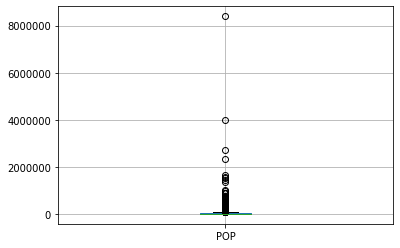

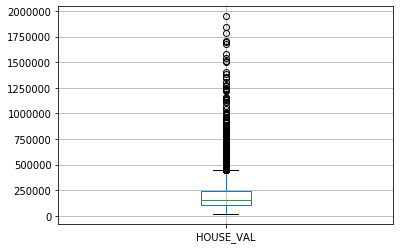

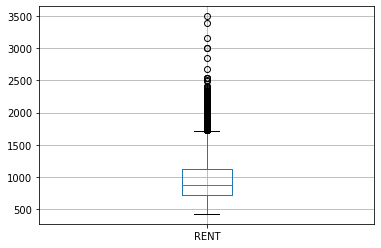

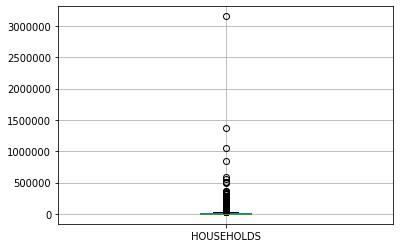

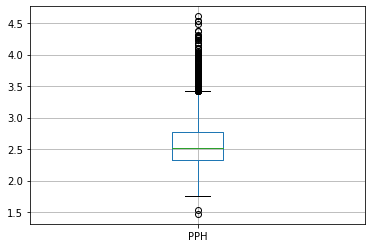

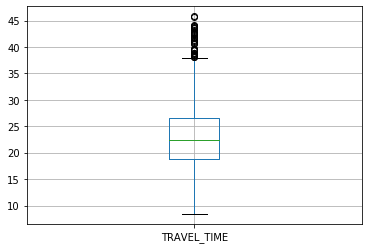

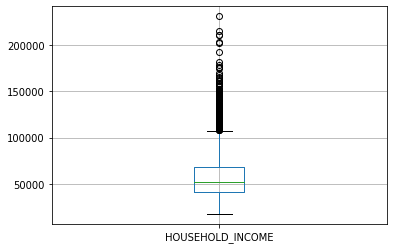

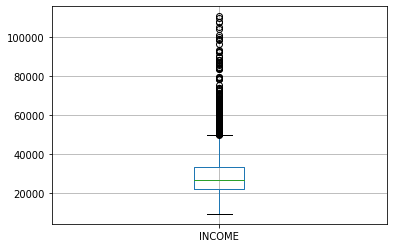

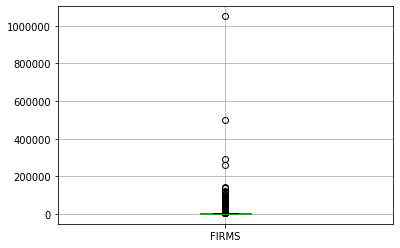

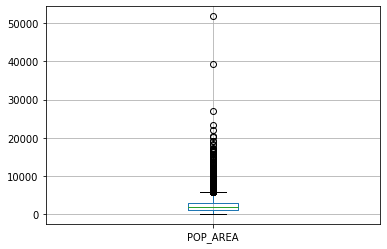

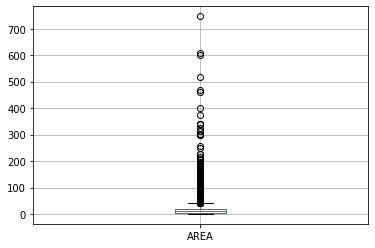

In [21]:
print("With Outliers:")
columns = [x for x in continuous if x not in percentages]
for column in columns:
    df.boxplot(column=column)
    plt.show()

In [22]:
def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        total = len(dataframe)
        num_removing = dataframe.shape[0]
        dataframe = dataframe[dataframe[column] > lower_fence]
        dataframe = dataframe[dataframe[column] < upper_fence]
        num_removing -= dataframe.shape[0]
        print(f"{num_removing} rows will be removed from {column}, {round(num_removing/total,2)*100}% of the total rows.")
    return dataframe

In [23]:
remove_outliers(columns, df).head()

362 rows will be removed from POP, 10.0% of the total rows.
247 rows will be removed from HOUSE_VAL, 8.0% of the total rows.
71 rows will be removed from RENT, 2.0% of the total rows.
206 rows will be removed from HOUSEHOLDS, 7.000000000000001% of the total rows.
145 rows will be removed from PPH, 6.0% of the total rows.
23 rows will be removed from TRAVEL_TIME, 1.0% of the total rows.
82 rows will be removed from HOUSEHOLD_INCOME, 3.0% of the total rows.
77 rows will be removed from INCOME, 3.0% of the total rows.
108 rows will be removed from FIRMS, 5.0% of the total rows.
128 rows will be removed from POP_AREA, 6.0% of the total rows.
146 rows will be removed from AREA, 7.000000000000001% of the total rows.


,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,...,TRAVEL_TIME,HOUSEHOLD_INCOME,INCOME,POVERTY,FIRMS,FEM_FIRM,NON_MINOR_FIRM,NON_VET_FIRM,POP_AREA,AREA
11,1,36435.0,0.076,0.262,0.116,0.527,0.494,0.437,0.003,0.007,...,22.9,40218.0,22501.0,0.225,3123.0,0.414025,0.534742,0.847262,1182.6,27.75
14,0,33340.0,0.066,0.263,0.114,0.506,0.735,0.145,0.003,0.013,...,30.9,78071.0,30328.0,0.105,2762.0,0.368573,0.790007,0.793266,1212.0,25.04
19,1,21531.0,0.069,0.261,0.166,0.530,0.097,0.889,0.005,0.003,...,24.2,26291.0,14856.0,0.352,2086.0,0.587248,0.191275,0.886865,896.0,25.29
24,1,25799.0,0.088,0.245,0.138,0.527,0.713,0.264,0.001,0.007,...,21.5,58239.0,26906.0,0.158,2479.0,0.337636,0.760791,0.888665,1392.7,16.75
26,0,21568.0,0.089,0.303,0.137,0.506,0.913,0.034,0.003,0.006,...,19.0,40047.0,20243.0,0.285,2255.0,0.317073,0.827938,0.806652,796.8,26.56


These boxplots look to be very tailed. We'll log transform these and check again for outliers. We won't remove the original columns until after EDA and Feature Engineering so that we can use the original values to make insights.

In [24]:
for column in columns:
    df["LOG_"+column]=np.log(df[column])

logged_columns = [x for x in list(df.columns) if "LOG_" in x]

Let's see how this changed the distribution of these variables.

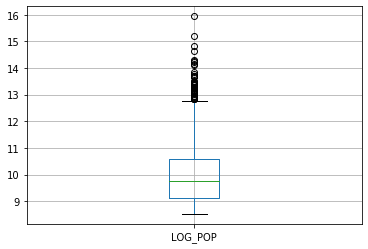

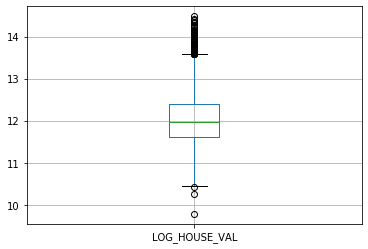

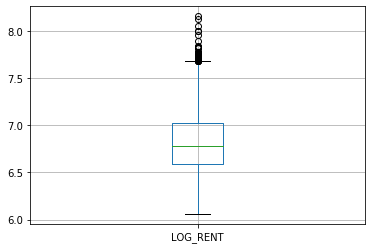

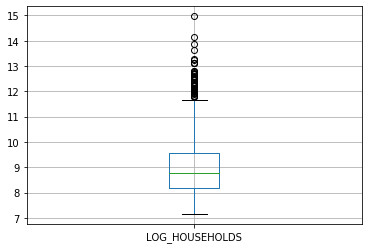

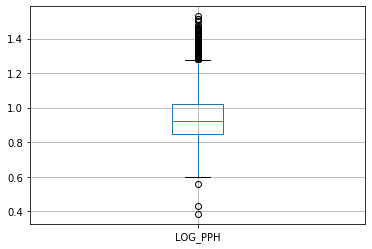

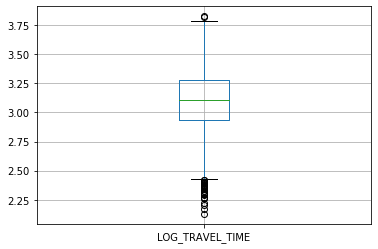

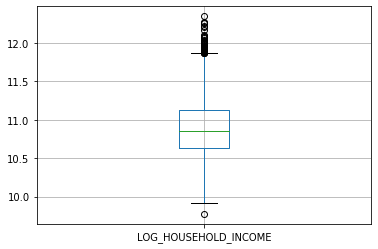

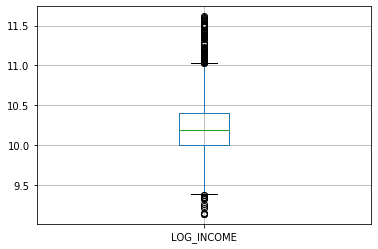

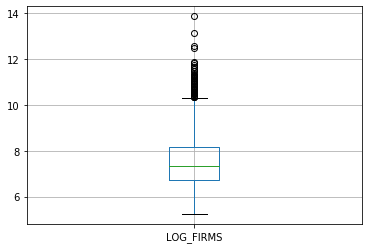

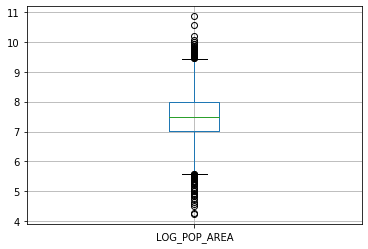

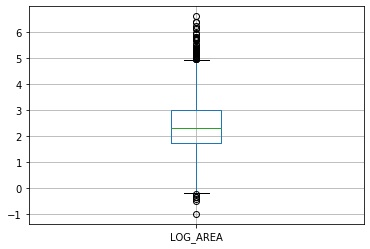

In [25]:
for column in logged_columns:
    df.boxplot(column=column)
    plt.show()

In [26]:
remove_outliers(logged_columns, df).head()

51 rows will be removed from LOG_POP, 1.0% of the total rows.
75 rows will be removed from LOG_HOUSE_VAL, 2.0% of the total rows.
14 rows will be removed from LOG_RENT, 0.0% of the total rows.
14 rows will be removed from LOG_HOUSEHOLDS, 0.0% of the total rows.
109 rows will be removed from LOG_PPH, 3.0% of the total rows.
37 rows will be removed from LOG_TRAVEL_TIME, 1.0% of the total rows.
19 rows will be removed from LOG_HOUSEHOLD_INCOME, 1.0% of the total rows.
58 rows will be removed from LOG_INCOME, 2.0% of the total rows.
8 rows will be removed from LOG_FIRMS, 0.0% of the total rows.
79 rows will be removed from LOG_POP_AREA, 3.0% of the total rows.
23 rows will be removed from LOG_AREA, 1.0% of the total rows.


,PA,POP,UNDER_5,UNDER_18,65_OR_OVER,FEMALE,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,...,LOG_HOUSE_VAL,LOG_RENT,LOG_HOUSEHOLDS,LOG_PPH,LOG_TRAVEL_TIME,LOG_HOUSEHOLD_INCOME,LOG_INCOME,LOG_FIRMS,LOG_POP_AREA,LOG_AREA
4,1,85108.0,0.069,0.254,0.156,0.528,0.727,0.174,0.002,0.049,...,12.543972,7.003065,10.394672,0.943906,3.173878,11.339072,10.691922,8.984944,7.456223,3.853546
5,0,68247.0,0.065,0.236,0.172,0.528,0.622,0.340,0.003,0.011,...,11.896826,6.599870,10.165890,0.947789,2.954910,10.729438,10.227309,8.797851,6.596600,4.493121
6,1,101113.0,0.059,0.188,0.117,0.524,0.511,0.441,0.003,0.024,...,12.066236,6.736967,10.468574,0.932164,2.960105,10.694668,10.141086,8.824972,7.314486,4.098171
7,1,65738.0,0.051,0.183,0.075,0.506,0.729,0.170,0.001,0.085,...,12.433208,6.766192,10.036706,0.928219,2.975530,10.706699,10.228863,8.446556,6.823613,4.061649
8,0,50440.0,0.049,0.244,0.107,0.502,0.741,0.150,0.007,0.055,...,12.409013,6.787845,9.830433,0.947789,2.975530,11.402240,10.721040,8.163656,7.279939,3.387436


That's much better. We remove these outliers below.

In [27]:
len(df)

3506

In [28]:
df = remove_outliers(logged_columns, df)

51 rows will be removed from LOG_POP, 1.0% of the total rows.
75 rows will be removed from LOG_HOUSE_VAL, 2.0% of the total rows.
14 rows will be removed from LOG_RENT, 0.0% of the total rows.
14 rows will be removed from LOG_HOUSEHOLDS, 0.0% of the total rows.
109 rows will be removed from LOG_PPH, 3.0% of the total rows.
37 rows will be removed from LOG_TRAVEL_TIME, 1.0% of the total rows.
19 rows will be removed from LOG_HOUSEHOLD_INCOME, 1.0% of the total rows.
58 rows will be removed from LOG_INCOME, 2.0% of the total rows.
8 rows will be removed from LOG_FIRMS, 0.0% of the total rows.
79 rows will be removed from LOG_POP_AREA, 3.0% of the total rows.
23 rows will be removed from LOG_AREA, 1.0% of the total rows.


In [29]:
len(df)

3019

Without Outliers:


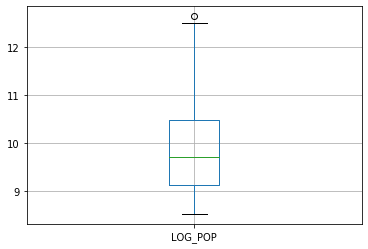

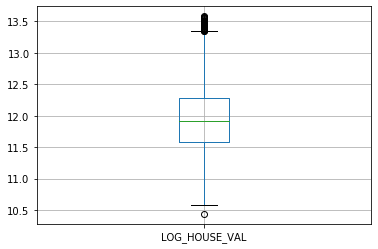

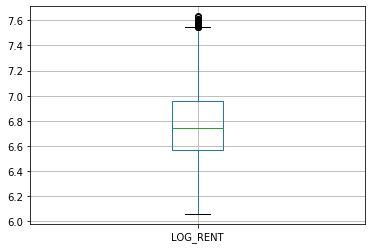

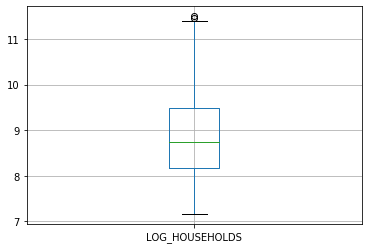

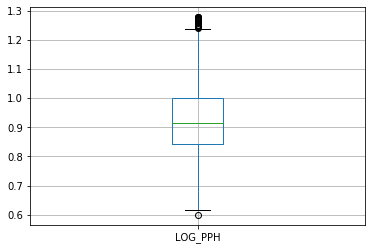

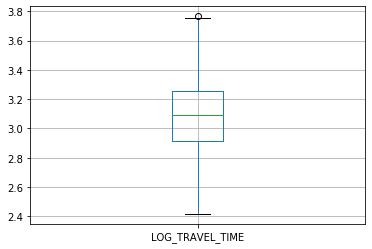

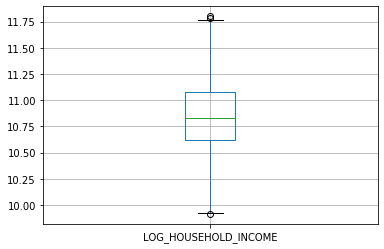

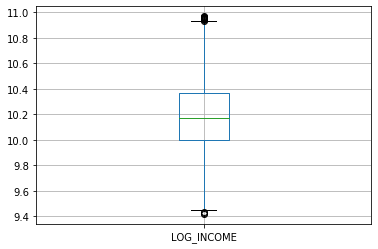

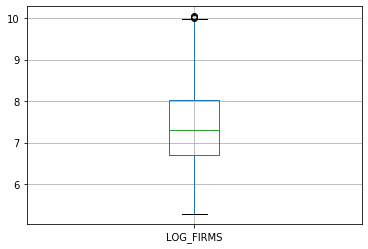

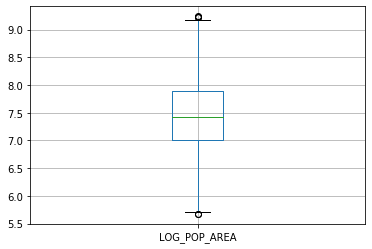

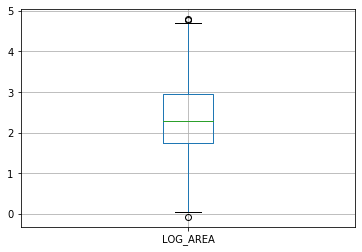

In [30]:
print("Without Outliers:")
for column in logged_columns:
    df.boxplot(column=column)
    plt.show()

## Exporting Clean Data

Now that we are done cleaning our data, we'll reset the index of our dataframe and export our clean data to a new CSV file.

In [31]:
df.shape

(3019, 51)

After cleaning, we are left with 39 features and 3,019 data points. Remember we will be removing the 11 original features we just log transformed after making insights from them.

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
df.to_csv('clean_city_data.csv')